# Data Visualization in Python
__Matplotlib__<br>
__Seaborn__

In [47]:
#Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 #inccrease resolution for plot on retina display

In [28]:
#load toy dataset
tips = sns.load_dataset("tips") # - tips from seaborn library
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
sns.set() #default seaborn style
#sns.set_style("whitegrid") #whitegrid style

In [4]:
#check first few records of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### LM plot - Scatter plot with linear regression line

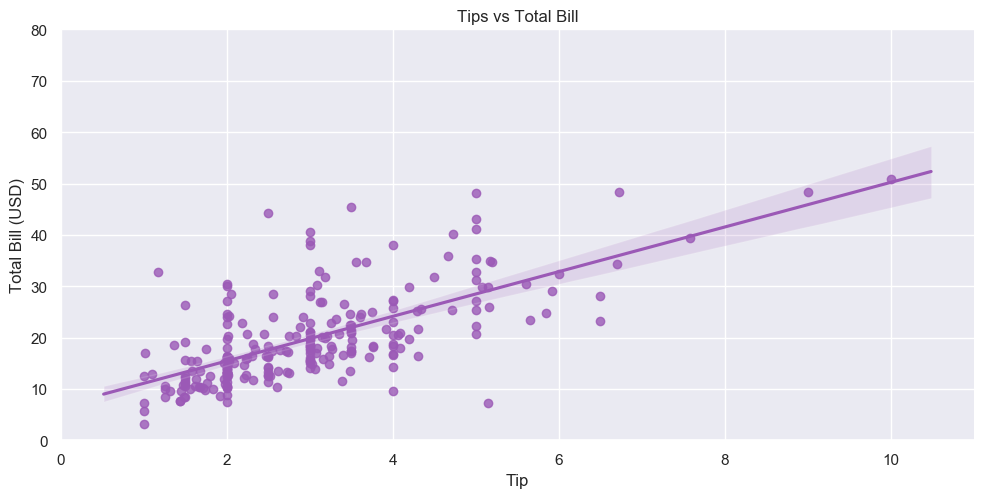

In [48]:
sns.set_context("notebook")
#sns.set_context("paper") # paper look
#sns.set_context("talk") # for a presentation
sns.set_palette("husl",3) 
sns.color_palette("husl") #temporarily set palette
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]    #set custom color palette
sns.set_palette(flatui) #set custom color palette
g = sns.lmplot(x="tip",y="total_bill",data=tips,aspect=2) #aspect width twice of height
g = (g.set_axis_labels("Tip","Total Bill (USD)").set(xlim=(0,11),ylim=(0,80)))
plt.title("Tips vs Total Bill")
plt.show(g)

### Subplot grid for plotting conditional relationships

In [68]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**FacetGrid**

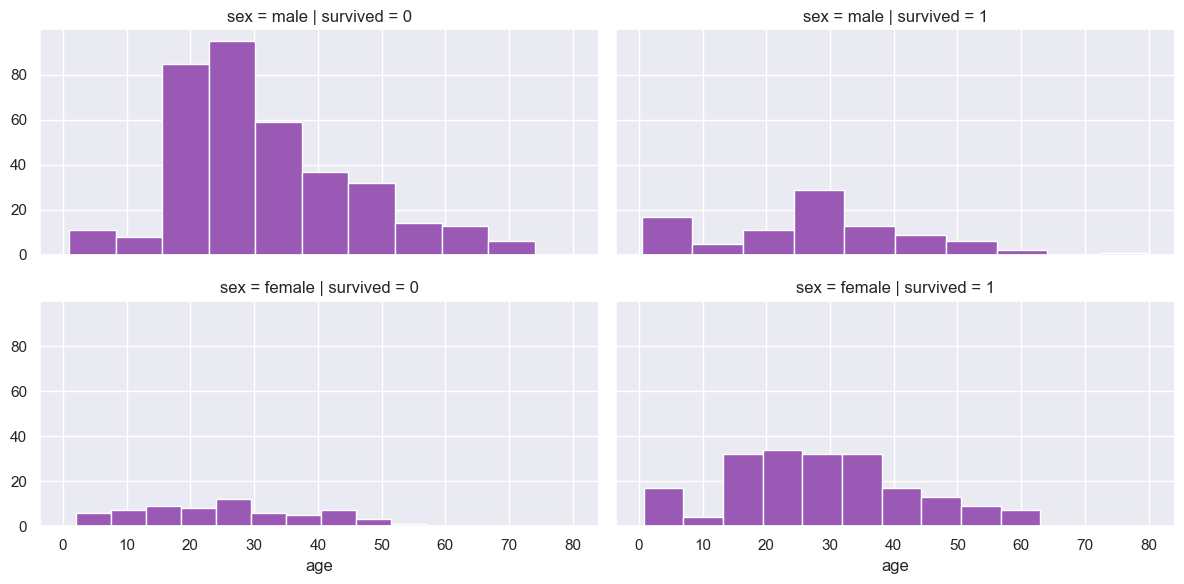

In [50]:
g = sns.FacetGrid(titanic,col="survived",row="sex",aspect=2)
g = g.map(plt.hist,"age")


**FactorPlot**

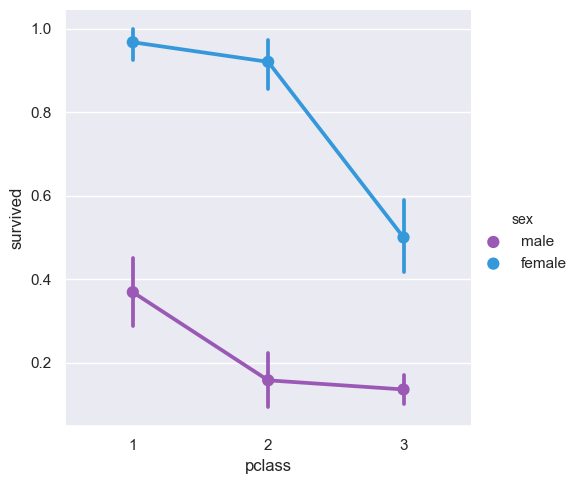

In [54]:
g = sns.factorplot(x="pclass",y="survived",hue="sex",data=titanic)

**lmplot**

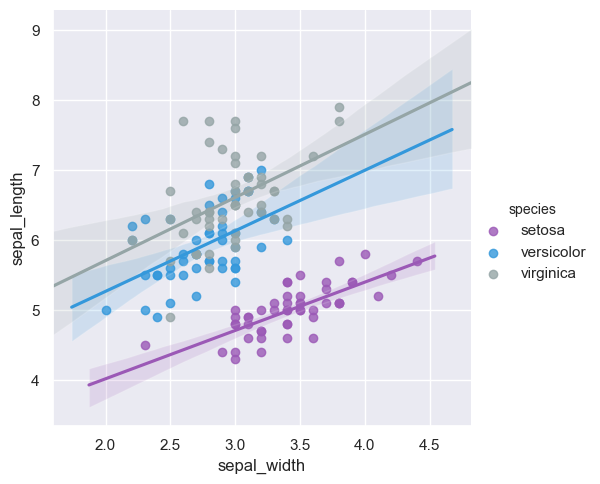

In [56]:
g = sns.lmplot(x="sepal_width",y="sepal_length",hue="species",data=iris)

### Subplot grid for plotting pairwise relationships

**PairGrid**

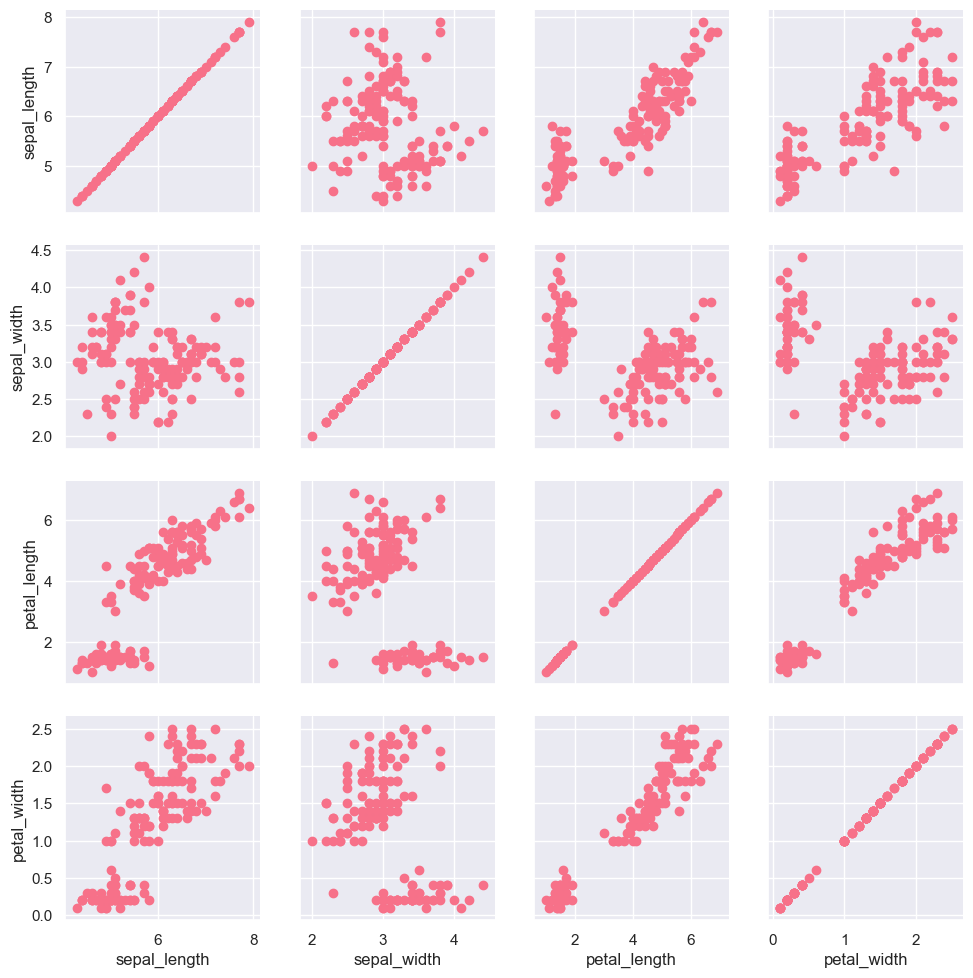

In [59]:
sns.set_palette("husl",3) 
h = sns.PairGrid(iris)
h = h.map(plt.scatter)

**PairPlot**

In [66]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


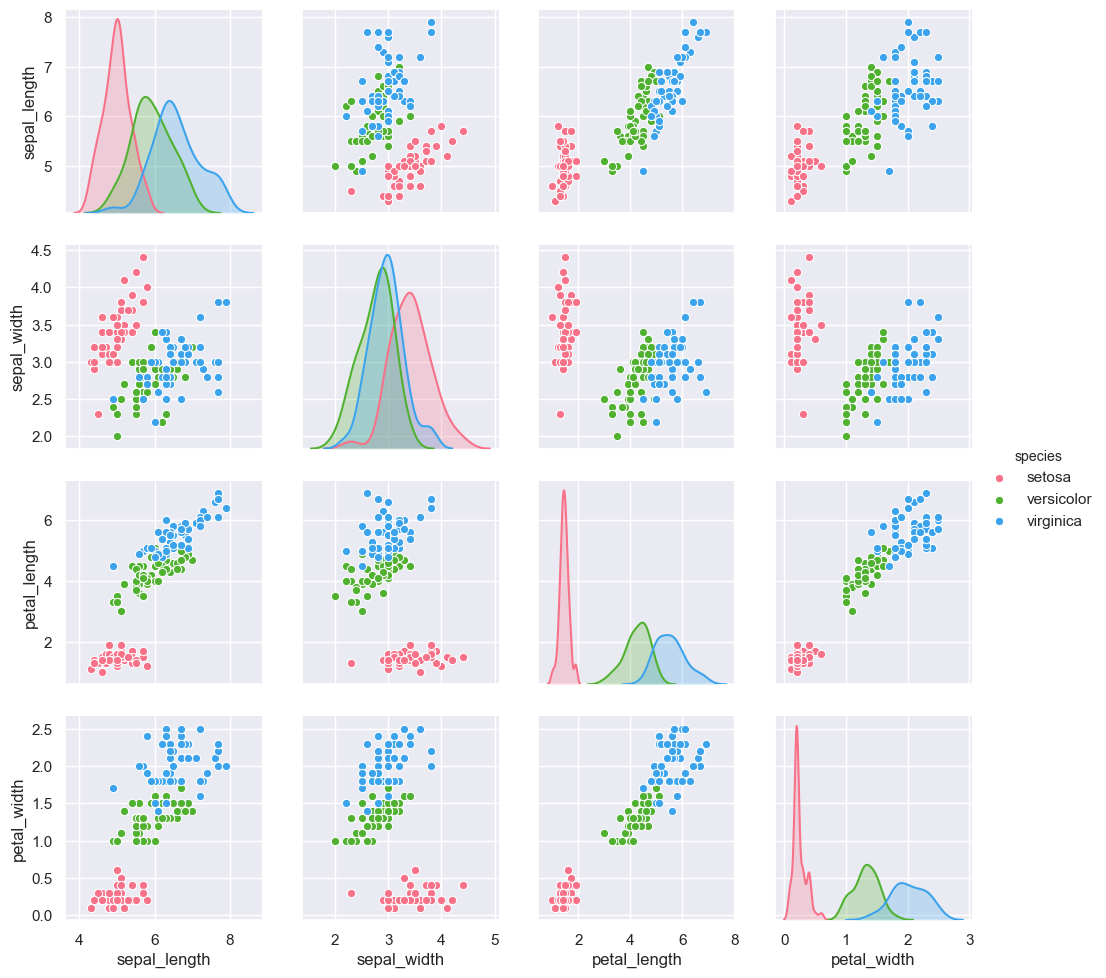

In [67]:
g = sns.pairplot(iris,hue="species")

**JointGrid - Plot Bivariate distribution**

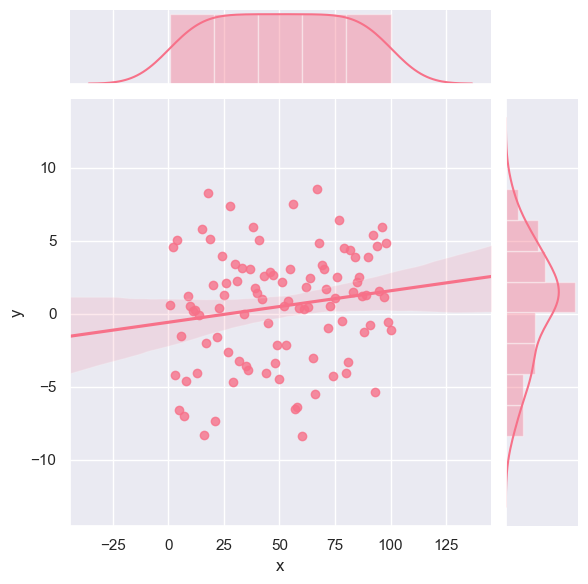

In [63]:
import pandas as pd
import numpy as np
uniform_data = np.random.rand(10,12)
data = pd.DataFrame({'x':np.arange(1,101),
                     'y':np.random.normal(0,4,100)})
i = sns.JointGrid(x="x",y="y",data=data)
i = i.plot(sns.regplot,sns.distplot)

**JointPlot**

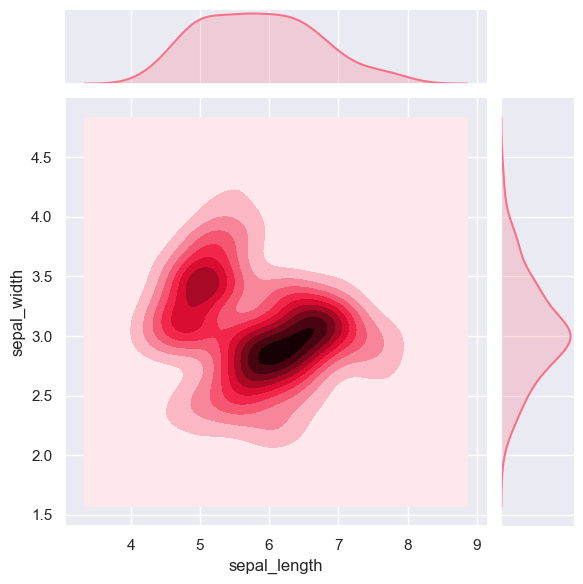

In [65]:
sns.jointplot("sepal_length","sepal_width",data=iris,kind='kde');

### Regression Plots

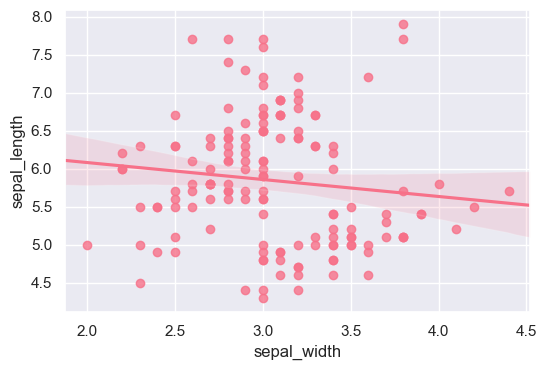

In [71]:
sns.regplot(x="sepal_width",y="sepal_length",data=iris);

### Distribution Plots

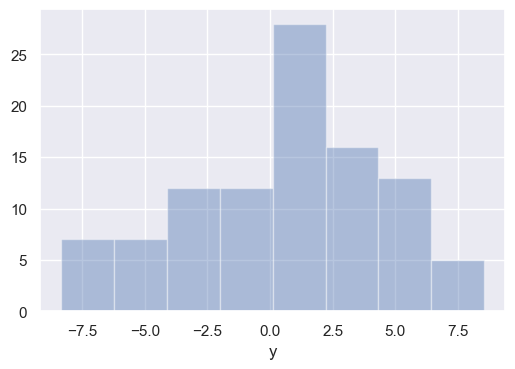

In [74]:
plot = sns.distplot(data.y,kde=False,color="b")

### Matrix Plots

In [81]:
uniform_data.shape

(10, 12)

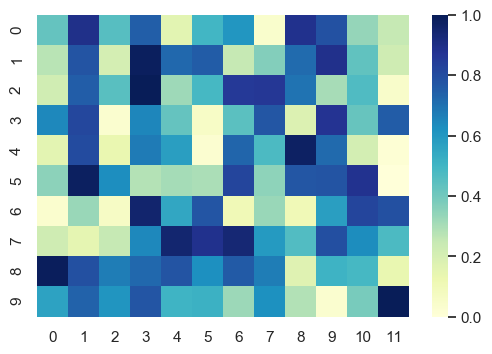

In [82]:
sns.heatmap(uniform_data,vmin=0,vmax=1,cmap="YlGnBu");

### Categorical Plots

**Scatterplot with one categorical variable**

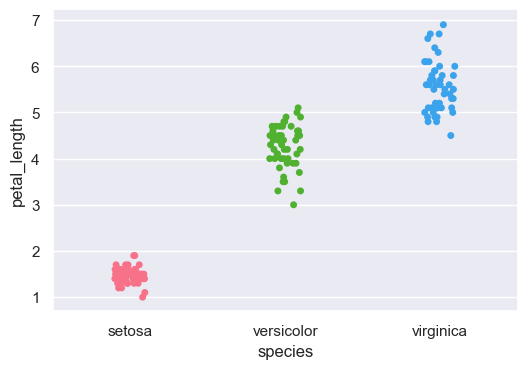

In [83]:
sns.stripplot(x="species",y="petal_length",data=iris);

**Categorical ScatterPlot with non-overlapping points**

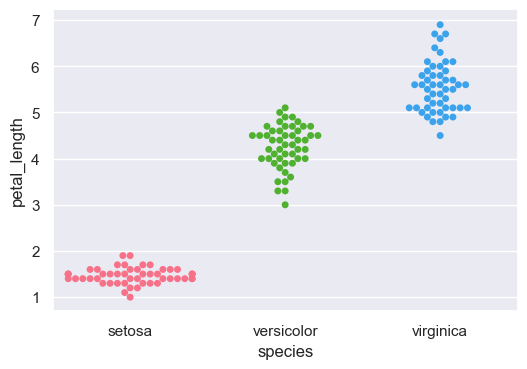

In [85]:
sns.swarmplot(x="species",y="petal_length",data=iris);

**BarChart**

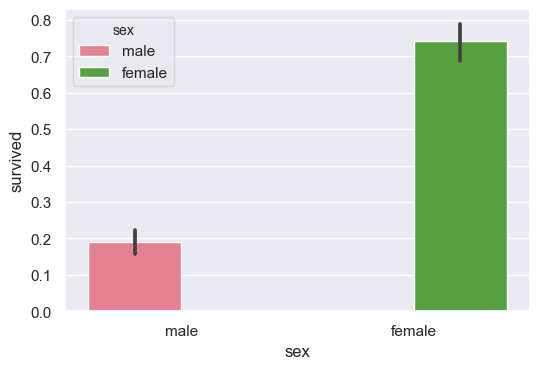

In [87]:
sns.barplot(x="sex",y="survived",hue="sex",data=titanic);

**CountPlot**

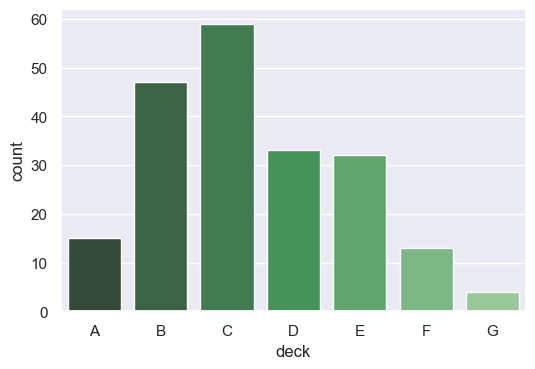

In [89]:
sns.countplot(x="deck",data=titanic,palette="Greens_d");

**PointPlot**

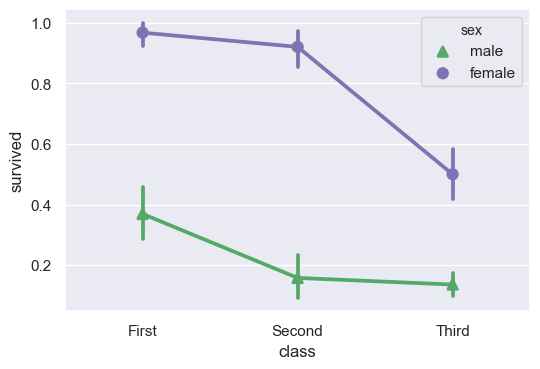

In [90]:
sns.pointplot(x="class",y="survived",hue="sex",data=titanic,palette={"male":"g","female":"m"},
             markers=["^","o"],linestyle=["-","--"]);

**BoxPlot**

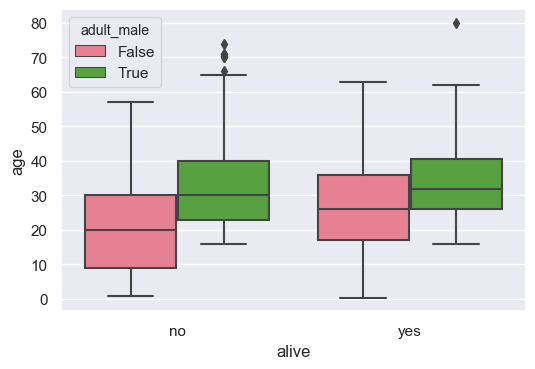

In [92]:
sns.boxplot(x="alive",y="age",hue="adult_male",data=titanic);

**ViolinPlot**

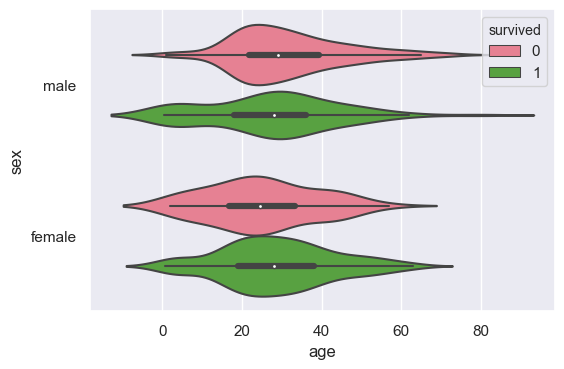

In [95]:
sns.violinplot(x="age",y="sex",hue="survived",data=titanic);
plt.savefig("violin.png",transparent=True)